In [3]:
%reload_ext autoreload
%autoreload 2

from alpharaw.mzml import MzMLReader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

from alphabase.spectral_library.base import SpecLibBase

### 1. Set up data
First we will point our notebook to the raw file and search results obtained using this raw file.

We will then load three objects into the notebook:
- The raw DIA data `dia_data`
- The search results `precursor_df`
- The spectral library `spectral_library`

In [25]:
root = Path("~//data/alphadia-validate/").expanduser()
path_search = root / 'output/precursors.tsv'
path_lib = root / 'output/speclib.hdf'
path_spectra = base_folder / '20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_07.raw'

In [30]:
from alphadia.data.alpharaw_wrapper import Thermo

precursor_df = pd.read_csv(path_search, sep='\t')
spectral_library = SpecLibBase()
spectral_library.load_hdf(path_lib)
dia_data =  Thermo(path_spectra)

49it [00:17,  2.78it/s]


### 2. Inspect data
Next we want to inspect the data structures to get a better understanding of the data.

#### 2.1 Spectral library
We will start with the spectral library.
It's an alphabase SpecLibBase object, which contains the following attributes:
- `precursor_df`: a pandas DataFrame containing the precursor information
- `fragment_mz_df`: a pandas DataFrame containing the fragment m/z values
- `fragment_intensity_df`: a pandas DataFrame containing the fragment intensities

The `precursor_df` links to the fragment_mz_df and fragment_intensity_df via the `frag_start_idx` and `frag_stop_idx` columns.
For unique indexing we will use the `mod_seq_charge_hash` column.

In [33]:
columns = ['precursor_mz', 'sequence', 'mods', 'mod_sites', 'charge', 'mod_seq_charge_hash', 'frag_start_idx', 'frag_stop_idx']
spectral_library.precursor_df[columns].head()

,precursor_mz,sequence,mods,mod_sites,charge,mod_seq_charge_hash,frag_start_idx,frag_stop_idx
0,474.764789,MIIWLEK,Oxidation@M,1,2,6778347273406786435,0,6
1,466.220746,FYSQQMK,,,2,15522010155980186642,6,12
2,409.218726,ADIEEIK,,,2,1205537395403030235,12,18
3,817.430175,ADIEEIK,,,1,1205537395403030234,18,24
4,451.215463,MFVSDFR,,,2,11088622922221221635,24,30


In [34]:
spectral_library.fragment_mz_df.head()

,b_z1,b_z2,y_z1,y_z2
0,148.042679,74.524979,801.486877,401.247101
1,261.126740,131.067001,688.402832,344.705048
2,374.210815,187.609039,575.318787,288.163025
3,560.290100,280.648682,389.239471,195.123367
4,673.374207,337.190735,276.155396,138.581329


In [35]:
spectral_library.fragment_intensity_df.head()

,b_z1,b_z2,y_z1,y_z2
0,0.000000,0.0,0.125327,0.000000
1,0.335304,0.0,1.000000,0.049048
2,0.282448,0.0,0.614709,0.001847
3,0.058418,0.0,0.219854,0.000000
4,0.024189,0.0,0.172246,0.000000


#### 2.2 Precursor data

The identified precursors following search are stored in the `precursor_df` DataFrame.
The precursors in this dataframe come from the spectral library but have aditional information on their identification.

The most important columns are:
- `mod_seq_charge_hash`: the hash of the precursor sequence and charge

The scans where they were identified called frames.
- `frame_start`: the frame number of the first frame in the run.
- `frame_stop`: the frame number of the last frame in the run

Furthermore there is the q-value and a multitude of scores that were used to identify the precursor.

In [36]:
precursor_df.head()

,base_width_mobility,base_width_rt,rt_observed,mobility_observed,mono_ms1_intensity,top_ms1_intensity,sum_ms1_intensity,weighted_ms1_intensity,weighted_mass_deviation,weighted_mass_error,...,_candidate_idx,valid,candidate_idx,run,mod_seq_hash,mod_seq_charge_hash,pg_master,pg,pg_qval,intensity
0,0.0,10.858948,215.645462,0.000001,5.671702e+06,5.671702e+06,1.397684e+07,4.629540e+06,1.317407,1.317407,...,387962,True,387962,20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21m...,6676861052106421843,6676861052106421845,Q04323,Q04323,0.0,6117868.5
1,0.0,10.866623,139.461288,0.000001,7.017734e+05,7.017734e+05,1.141551e+06,4.569544e+05,-0.344464,0.344464,...,321953,True,321953,20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21m...,1446457374900626415,1446457374900626417,Q9H2G2,Q9H2G2,0.0,31296790.0
2,0.0,10.876144,242.052673,0.000001,2.583778e+06,2.583778e+06,5.314894e+06,1.884685e+06,0.569951,0.569951,...,376954,True,376954,20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21m...,12973433993431495764,12973433993431495766,Q29RF7,Q29RF7,0.0,12477771.0
3,0.0,10.868530,207.885986,0.000001,1.231147e+06,1.231147e+06,2.963482e+06,9.690639e+05,1.002455,1.002455,...,430315,True,430315,20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21m...,8447969178672477057,8447969178672477059,P05198,P05198,0.0,81458184.0
4,0.0,10.909012,254.506622,0.000001,1.012001e+06,1.012001e+06,2.033442e+06,7.095401e+05,0.353570,0.353570,...,359561,True,359561,20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21m...,3047295262910009981,3047295262910009983,Q8N954,Q8N954,0.0,3113382.0


#### 2.3 DIA data

Last, we have the raw DIA data objecrt loaded from the Thermo raw file.

This object contains all scans in the `dia_data.spectrum_df` DataFrame.
Each spectrum points to a collection of peak based on the `peak_start_idx` and `peak_stop_idx` columns.

These point to the `dia_data.peak_df` DataFrame, which contains the peak information.

In [37]:
dia_data.spectrum_df.head()

,spec_idx,peak_start_idx,peak_stop_idx,rt,precursor_mz,precursor_charge,isolation_lower_mz,isolation_upper_mz,ms_level,nce
0,0,0,35,0.000000,-1.00000,0,-1.000000,-1.000000,1,0.0
1,1,35,42,0.000439,385.42508,0,384.424625,386.425535,2,25.0
2,2,42,43,0.000521,389.42691,0,388.426455,390.427365,2,25.0
3,3,43,44,0.000601,395.42963,0,394.429175,396.430085,2,25.0
4,4,44,45,0.000694,397.43054,0,396.430085,398.430995,2,25.0


In [38]:
dia_data.peak_df.head()

,mz,intensity
0,459.638519,13105.375977
1,470.064972,10583.207031
2,472.338043,10462.697266
3,479.018433,10998.292969
4,507.042847,13371.034180


#### 3 Map precursor hit from search results to raw data

Using this information we can map the identified precursors to the raw data.

We will use the `get_library_entry_by_hash` function to get the library entry for a given hash.

This function returns the library entry, the fragment m/z values and the fragment intensities.



In [46]:
_hash = precursor_df['mod_seq_charge_hash'].iloc[0]

def get_library_entry_by_hash(speclib, _hash, min_intensity=0.01):
    speclib_entry = speclib.precursor_df[speclib.precursor_df['mod_seq_charge_hash'] == _hash].iloc[0]

    fragment_mz = speclib.fragment_mz_df.iloc[speclib_entry.frag_start_idx:speclib_entry.frag_stop_idx].to_numpy().flatten()
    fragment_intensity = speclib.fragment_intensity_df.iloc[speclib_entry.frag_start_idx:speclib_entry.frag_stop_idx].to_numpy().flatten()
    fragment_mask = fragment_intensity > min_intensity

    fragment_mz = fragment_mz[fragment_mask]
    fragment_intensity = fragment_intensity[fragment_mask]

    # sort both by mz
    fragment_order = np.argsort(fragment_mz)
    fragment_mz = fragment_mz[fragment_order]
    fragment_intensity = fragment_intensity[fragment_order]

    return speclib_entry, fragment_mz, fragment_intensity

speclib_entry, mz_library, intensity_library = get_library_entry_by_hash(spectral_library, _hash)

speclib_entry, mz_library, intensity_library

(cardinality                                1
 channel                                    0
 charge                                     2
 decoy                                      0
 elution_group_idx                     193996
 frag_start_idx                       2153558
 frag_stop_idx                        2153578
 genes                            UBXN1_HUMAN
 i_0                                 0.379593
 i_1                                 0.354262
 i_2                                 0.190866
 i_3                                 0.075279
 instrument                             Lumos
 mod_seq_charge_hash      6676861052106421845
 mod_seq_hash             6676861052106421843
 mod_sites                                   
 mods                                        
 mono_isotope_idx                           0
 nAA                                       21
 nce                                       30
 precursor_idx                        8089248
 precursor_mz                     

alt.Chart(...)

In [73]:
def get_obsevered_intensity_by_entries(dia_data, speclib_entry, precursor_entry):
    jit_data = dia_data.jitclass()
    precursor_query = np.array([[speclib_entry.precursor_mz, speclib_entry.precursor_mz]], dtype=np.float32)
    scan_limits = np.array([[precursor_entry.scan_start, precursor_entry.scan_stop, 1]], dtype=np.int64)
    frame_limits = np.array([[precursor_entry.frame_start, precursor_entry.frame_stop, 1]], dtype=np.int64)
    
    dense, precursor_index = jit_data.get_dense(
        frame_limits,
        scan_limits,
        mz_library,
        30, # ppm
        precursor_query,
    )
    intensity_observed = dense[0].sum(axis=(1,2,3))
    return intensity_observed

In [77]:
def get_df(dia_data, spectral_library, _hash, min_intensity=0.01):
    speclib_entry, mz_library, intensity_library = get_library_entry_by_hash(
        spectral_library, 
        _hash, 
        min_intensity
    )
    df_lib = pd.DataFrame({
            "m/z": mz_library,
            "Intensity": intensity_library / intensity_library.max(),
    })

    precursor_entry = precursor_df[precursor_df['mod_seq_charge_hash'] == _hash].iloc[0]
    intensity_observed = get_obsevered_intensity_by_entries(dia_data, speclib_entry, precursor_entry)
    df_obs = pd.DataFrame({
            "m/z": mz_library,
            "Intensity": intensity_observed / intensity_observed.max()
    })
    df_obs.Intensity = -df_obs.Intensity # for plotting
    df = pd.concat([df_lib, df_obs])
    return df

df = get_df(dia_data, spectral_library, _hash)
df.tail()

,m/z,Intensity
23,1304.607666,-0.252088
24,1433.650269,-0.116076
25,1520.682373,-0.112218
26,1607.714355,-0.085667
27,1708.762085,-0.022340


#### 4 Visualize precursor data

Now, we want to viosualize the retrieved spectrum data.
We will start by visualizing the observed spectrum and the library spectrum.

The spectrum data `dense` is a 5 dimensional numpy array with a dense slice of the spectrum space.
The dimensions are:
- 0: either intensity information 0 or relative mass error 1
- 1: index of the fragment mz which was queried
- 2: ion mobility dimension (will be zero for DIA data)
- 3: The observations in the DIA cycle. As there might be multiple quadrupole windows where the precursor was detected, this will be a list of observations.
- 4: Retention time datapoints.

First we will select the intensity dimension and sum over all other dimensions but the fragment mz dimension.


In [78]:
import altair as alt

chart = (
        alt.Chart(df)
        .mark_bar(size=2, color="black")
        .encode(alt.X("m/z:Q", bin=False), y="Intensity:Q")
    )
chart

alt.Chart(...)

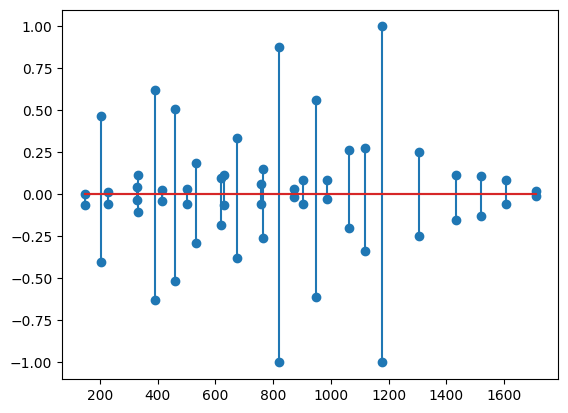

In [42]:
intensity_observed = dense[0].sum(axis=(1,2,3))
intensity_observed_normalized = intensity_observed / intensity_observed.max()
intensity_library_normalized = intensity_library / intensity_library.max()

plt.stem(mz_library, intensity_observed_normalized)
plt.stem(mz_library, -intensity_library_normalized)
plt.show()

Finally, we will visualize the Precusor ion chromatogram.
We will again select the intensity dimension and sum over ion mobility and observation but leave the retention time dimension.


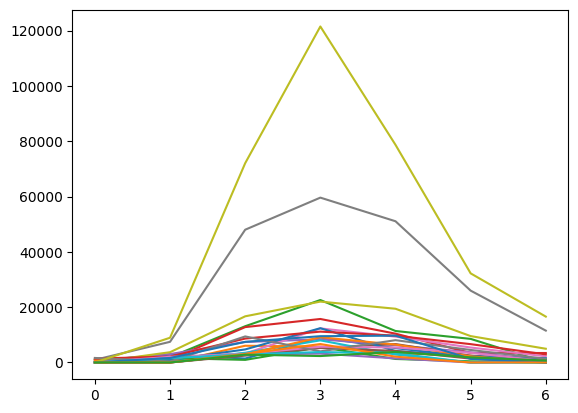

In [20]:
xic_observed = dense[0].sum(axis=(1,2))
for i in range(xic_observed.shape[0]):
    plt.plot(xic_observed[i])
plt.show()